## Question 1

lengeth of t1  50
lengeth of t2  100
lengeth of t3  106
lengeth of T  256


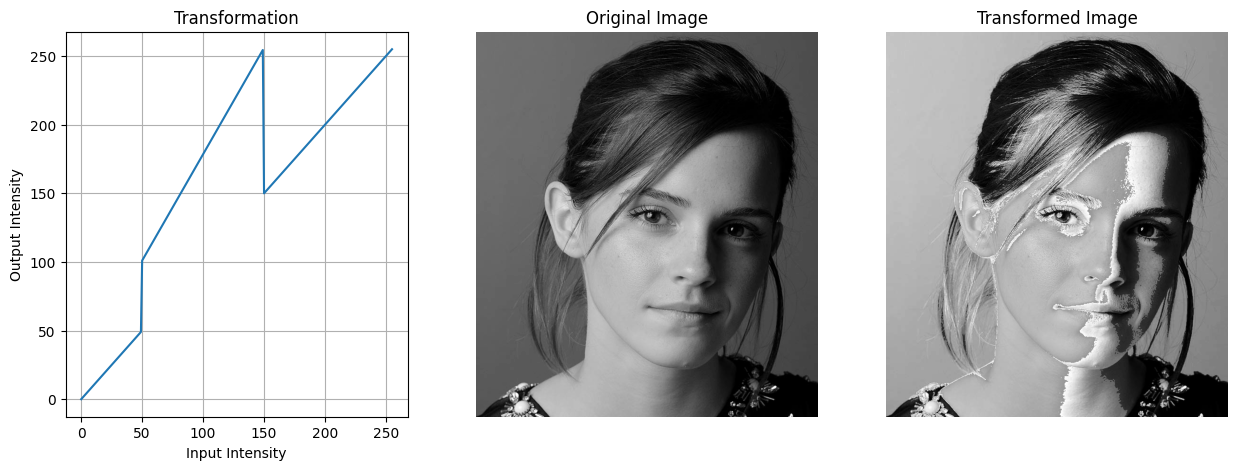

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


#  Creating the transformation function
t1 = np.arange(0, 50, 1)
t2 = np.arange(101, 256, 1.55)
t3 = np.arange(150, 256, 1)
T = np.concatenate((t1, t2, t3), axis=0)
#  Reading the image
img_original = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
#  Transforming the image
img_transformed =  cv.LUT(img_original, T)


#  Plotting the transformation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(T)
ax[0].set_title('Transformation')
ax[0].grid()
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')

#  Plotting the original image
ax[1].imshow(img_original, cmap='gray')
ax[1].set_title('Original Image')
ax[1].axis('off')

#  Plotting the transformed image
ax[2].imshow(img_transformed, cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.show()


## Question 2

(0.0, 1.0, 0.0, 1.0)

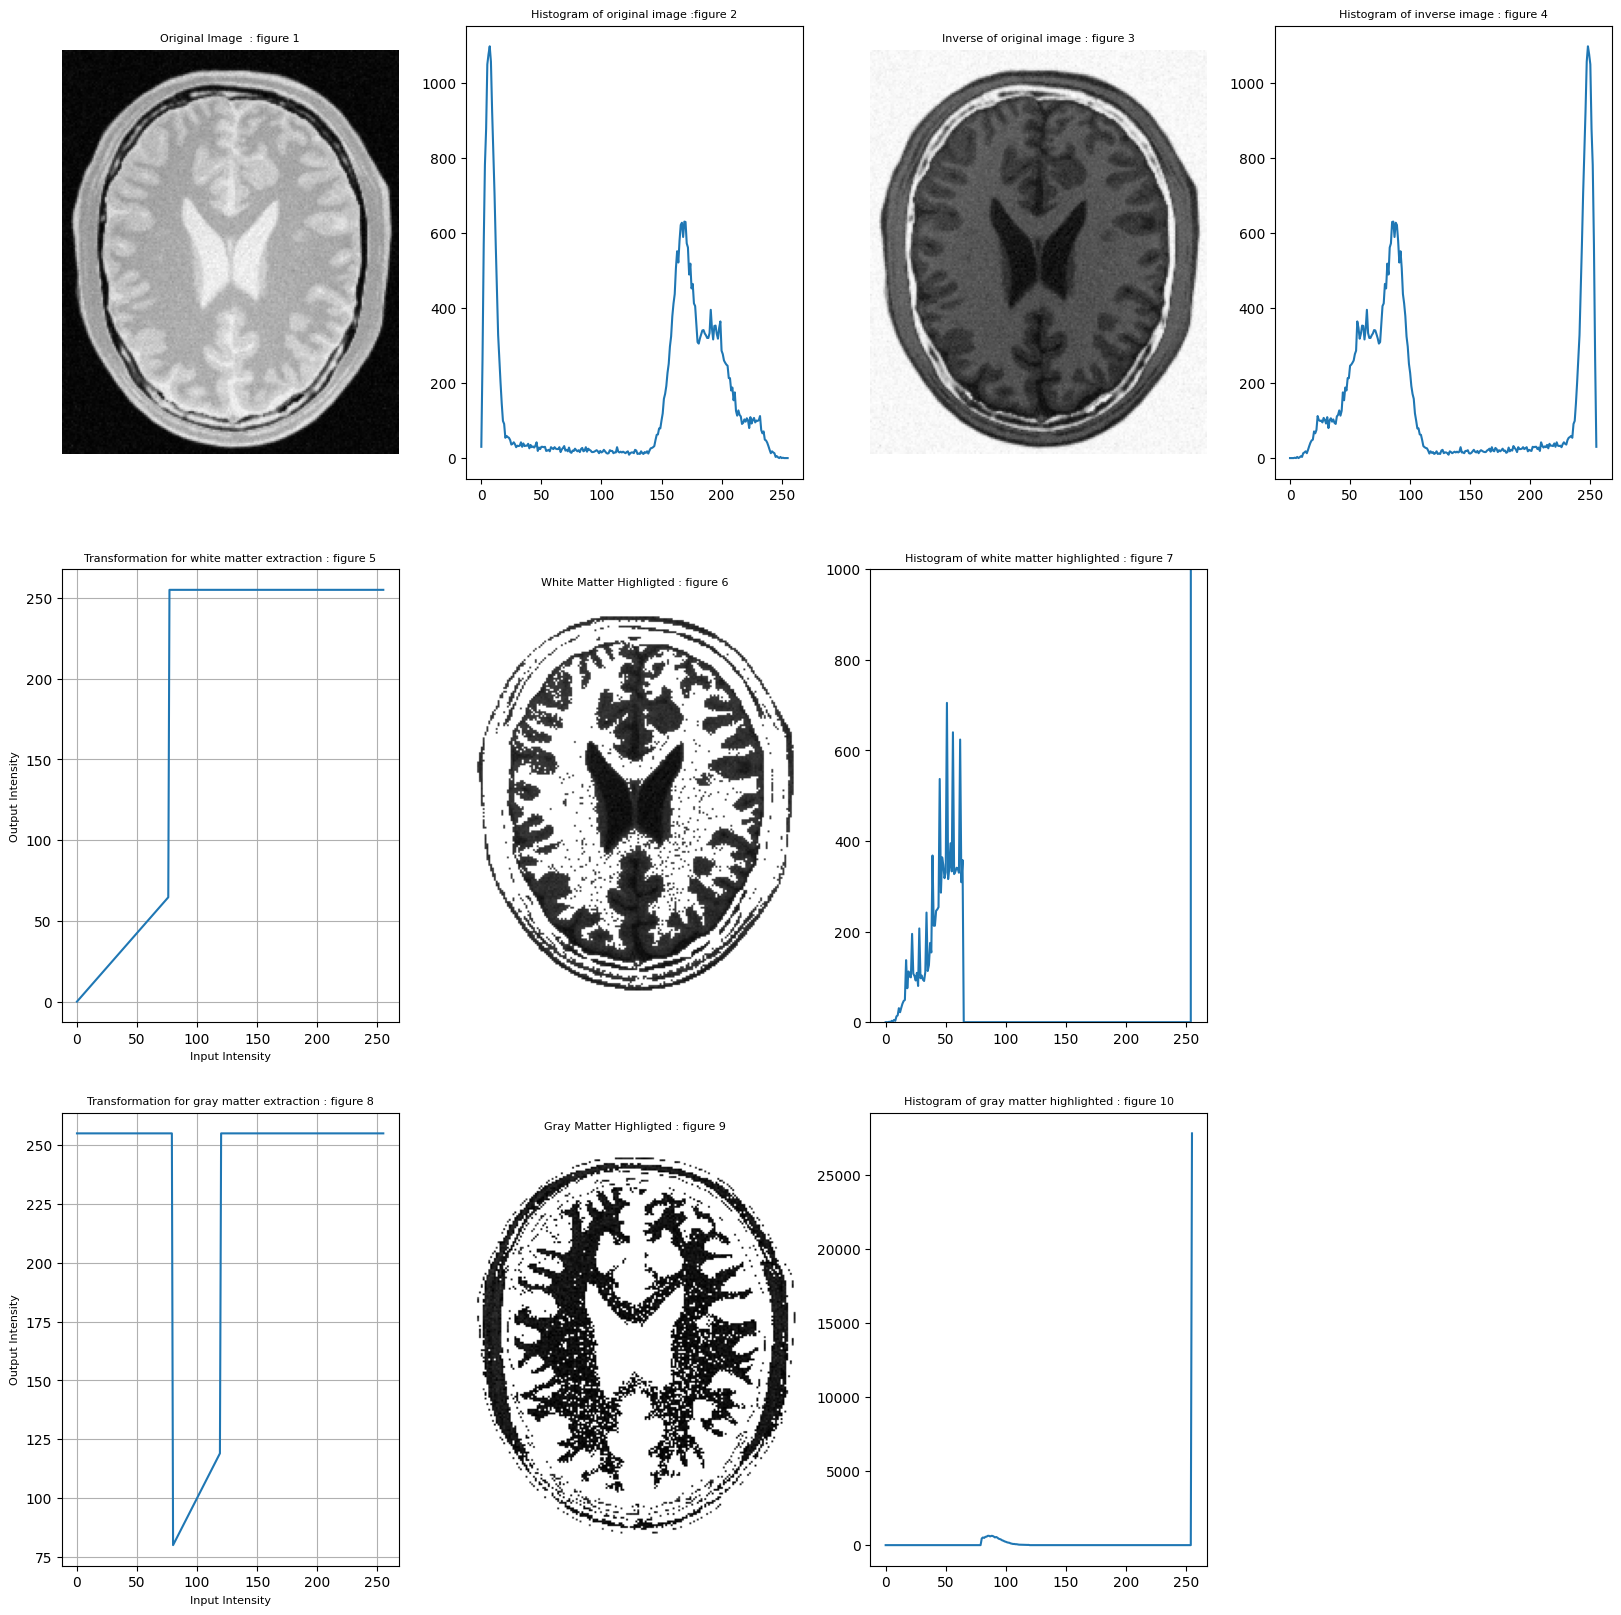

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image (replace 'brain_image.jpg' with your image filename)
img = cv2.imread('BrainProtonDensitySlice9.png', cv2.IMREAD_GRAYSCALE)

#plots
fig,ax = plt.subplots(3,4,figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].set_title('Original Image  : figure 1',fontsize=8)
ax[0,0].axis('off')

# Analyze histogram to find the best threshold_white_matter value
hist = cv2.calcHist([img],[0],None,[256],[0,256])
ax[0,1].plot(hist)
ax[0,1].set_title('Histogram of original image :figure 2',fontsize=8)

#inverse of image
img1 = 255 - img
ax[0,2].imshow(img1,cmap='gray')
ax[0,2].set_title('Inverse of original image : figure 3',fontsize=8)
ax[0,2].axis('off')

# Analyze histogram to find intensity transformation
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
ax[0,3].plot(hist)
ax[0,3].set_title('Histogram of inverse image : figure 4',fontsize=8)
#definiting a intenity transformation array to use cv.LUT
threshold_white_matter = 65
t1 = np.arange(0, threshold_white_matter, 0.85)
t2 = 255 - np.zeros(256 - len(t1))  
T = np.concatenate((t1, t2))

ax[1,0].plot(T)
ax[1,0].set_title('Transformation for white matter extraction : figure 5',fontsize=8) 
ax[1,0].grid()
ax[1,0].set_xlabel('Input Intensity',fontsize=8)
ax[1,0].set_ylabel('Output Intensity', fontsize=8)

#white matter highlighted image
img2 = cv2.LUT(img1,T).astype(np.uint8)
ax[1,1].imshow(img2,cmap='gray')
ax[1,1].set_title('White Matter Highligted : figure 6',fontsize=8) 
ax[1,1].axis('off')

# histogram of white matter highlighted image
hist = cv2.calcHist([img2],[0],None,[256],[0,256])
ax[1,2].plot(hist)
ax[1,2].set_title('Histogram of white matter highlighted : figure 7',fontsize=8)
#limit y axis to 0-1000
ax[1,2].set_ylim([0,1000])

#gray matter highlighted image
#piecewise linear transformation contains 3 parts , mid part is linear, left and right part is 255
threshold_gray_matter_start = 80
threshold_gray_matter_end = 120

t_mid = np.arange(threshold_gray_matter_start, threshold_gray_matter_end, 1)
t_left = 255-np.zeros(threshold_gray_matter_start)
t_right = 255 - np.zeros(256 - threshold_gray_matter_end)
T = np.concatenate((t_left, t_mid, t_right))

ax[2,0].plot(T)
ax[2,0].set_title('Transformation for gray matter extraction : figure 8',fontsize=8)
ax[2,0].grid()
ax[2,0].set_xlabel('Input Intensity',fontsize=8)
ax[2,0].set_ylabel('Output Intensity', fontsize=8)

img3 = cv2.LUT(img1,T).astype(np.uint8)
ax[2,1].imshow(img3,cmap='gray')
ax[2,1].set_title('Gray Matter Highligted : figure 9',fontsize=8)
ax[2,1].axis('off')

# histogram of gray matter highlighted image
hist = cv2.calcHist([img3],[0],None,[256],[0,256])
ax[2,2].plot(hist)
ax[2,2].set_title('Histogram of gray matter highlighted : figure 10',fontsize=8)

ax[1,3].axis('off')
ax[2,3].axis('off')



# Question 3